In [5]:

# !pip install tensorflow
# !pip install --upgrade pip
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [15]:
# By default it will take float values
t=tf.ones([5,2,3])


#Below reshaping will always be 2 dimensional -1 will multiply the remaining dimensions of tensors
t=tf.reshape(t,[5,-1])
print(t)


tf.Tensor(
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]], shape=(5, 6), dtype=float32)


(0.0, 6.0, 0.0, 20.0)

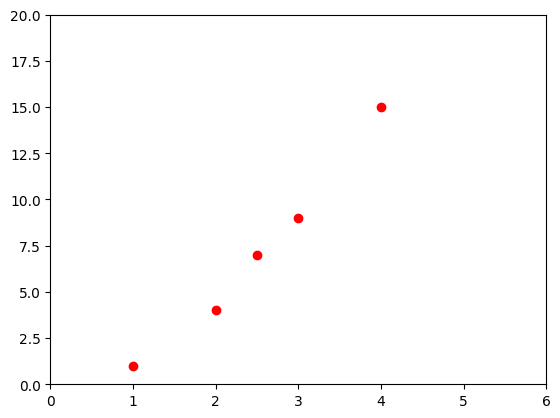

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x=[1,2,2.5,3,4]
y=[1,4,7,9,15]
plt.plot(x,y,"ro")
# starting and ending point of x axis and starting and ending point of y axis
plt.axis([0,6,0,20])


In [23]:
!pip install __future__
from __future__ import absolute_import,division,print_function,unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

11435.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not found: pip


### Linear Regression and Ridge Lasso Regression Practice

In [19]:
#house pricing dataset

from sklearn.datasets import fetch_california_housing
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=fetch_california_housing()
# getting the data and converting them into a data frame, as the data is not in format
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [28]:
dataset['Price']=df.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Dividing the dataset into dependent and independent features

In [39]:
# So the first parameter in iloc is rows/records only one colon : means take all the records and second parameter in column in which
# we define take all the columns expcept the last column which is we are not taking last column -1
independentFeatures=dataset.iloc[:,:-1]
dependentFeature=dataset.iloc[:,-1]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0#### Now applying Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
# cross-val_score is responsible for cross validation
# cross validation is necessary for dividing the dataset into training and testing
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()

mse=cross_val_score(lin_reg,independentFeatures,dependentFeature,scoring='neg_mean_squared_error',cv=5)

mean_mse=np.mean(mse)
print(mean_mse)

-0.5582901717686565


In [41]:
lin_reg.fit(independentFeatures,dependentFeature)
lin_reg.predict(independentFeatures)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])